In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-10-04 08:35:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245, 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  31.3MB/s    in 1.1s    

2024-10-04 08:35:10 (31.3 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

In [3]:
import pandas as pd

In [4]:
QUERY = """
SELECT COUNT(*)
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [5]:
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [9]:
import matplotlib.pyplot as plt



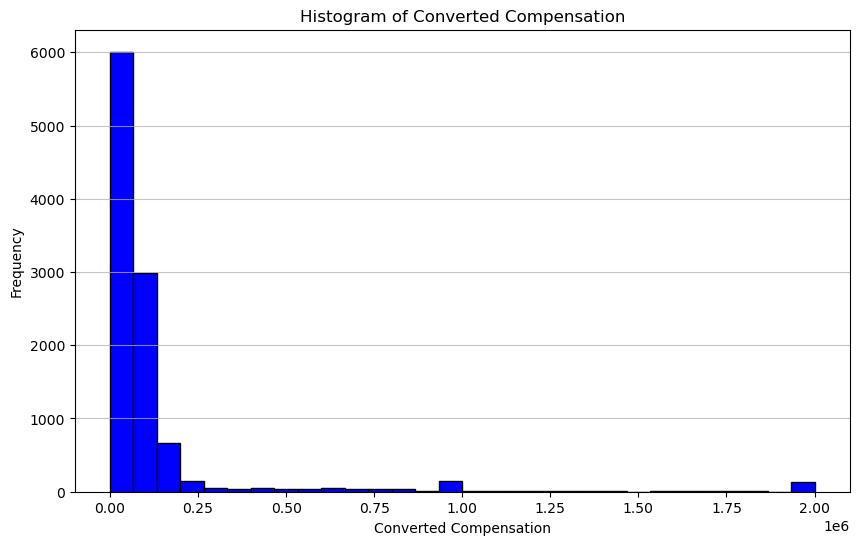

In [23]:
Query1 = """
SELECT ConvertedComp 
FROM master
"""
ConvertedComp = pd.read_sql_query(Query1, conn)

plt.figure(figsize=(10, 6))
plt.hist(ConvertedComp['ConvertedComp'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

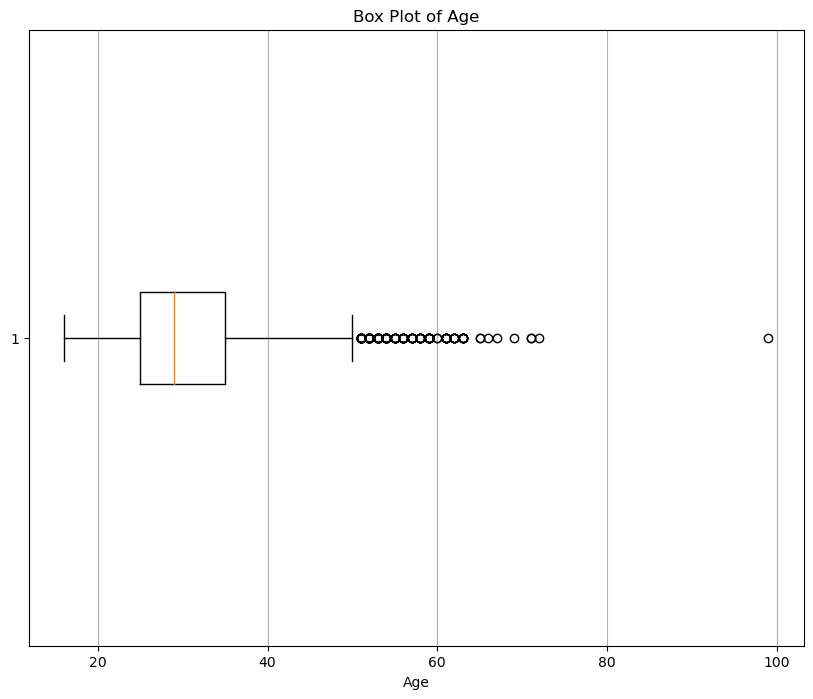

In [24]:
Query2 = """
SELECT Age 
FROM master
"""
Age = pd.read_sql_query(Query2, conn)

plt.figure(figsize=(10, 8))
plt.boxplot(Age['Age'].dropna(), vert=False)  
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(axis='x')
plt.show()

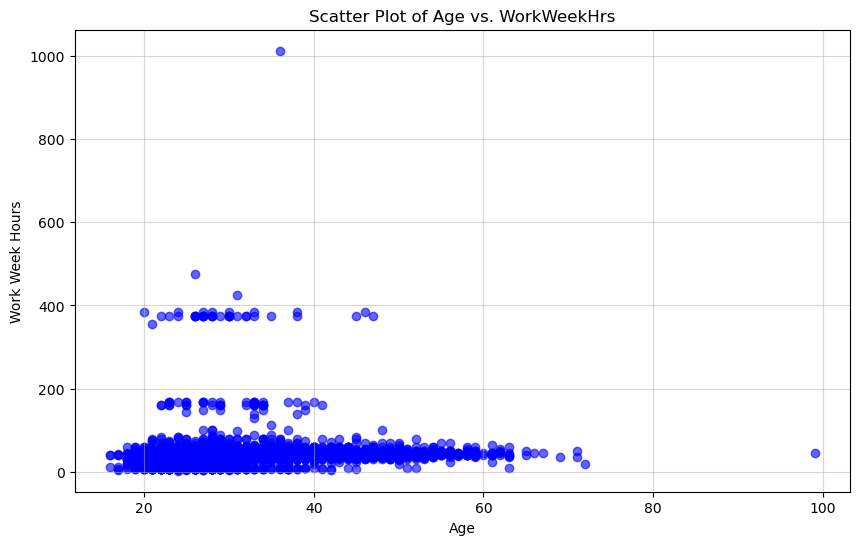

In [25]:
Query3 = """
SELECT Age, WorkWeekHrs 
FROM master
"""


data = pd.read_sql_query(Query3, conn)


data = data.dropna(subset=['Age', 'WorkWeekHrs'])

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['WorkWeekHrs'], alpha=0.6, color='blue')
plt.title('Scatter Plot of Age vs. WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid(alpha=0.5)
plt.show()

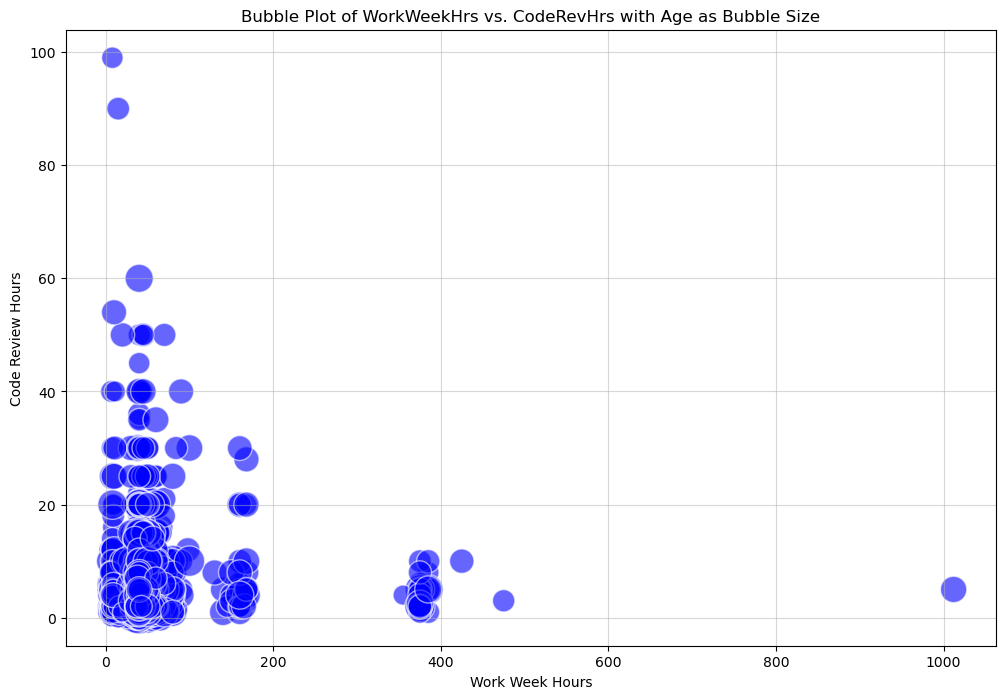

In [26]:
Query4 = """
SELECT WorkWeekHrs, CodeRevHrs, Age 
FROM master
"""

data = pd.read_sql_query(Query4, conn)

data = data.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

plt.figure(figsize=(12, 8))
plt.scatter(data['WorkWeekHrs'], data['CodeRevHrs'], 
            s=data['Age'] * 10,  # Scale bubble size (adjust multiplier as needed)
            alpha=0.6, 
            color='blue', 
            edgecolors='w')

plt.title('Bubble Plot of WorkWeekHrs vs. CodeRevHrs with Age as Bubble Size')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.grid(alpha=0.5)
plt.show()

([<matplotlib.patches.Wedge at 0x7f0f80b9c490>,
 [Text(1.1736914154044327, 1.1597191303957783, 'PostgreSQL'),
  Text(-0.9921837807065633, 1.3183593384592953, 'MongoDB'),
  Text(-1.5602426637717488, -0.536789372236856, 'Redis'),
  Text(-0.08034500476514456, -1.6480426815496283, 'MySQL'),
  Text(1.4365316698453372, -0.8117122405947613, 'Elasticsearch')],
 [Text(0.6401953174933268, 0.6325740711249699, '24.8%'),
  Text(-0.5411911531126707, 0.71910509370507, '20.9%'),
  Text(-0.8510414529664083, -0.292794203038285, '19.1%'),
  Text(-0.043824548053715204, -0.8989323717543425, '18.8%'),
  Text(0.7835627290065474, -0.4427521312335061, '16.4%')])

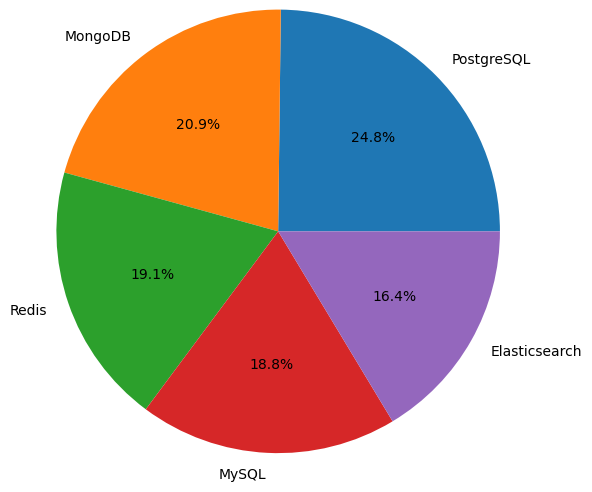

In [27]:
Query5="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""

DatabaseDesireNextYear= pd.read_sql_query(Query5, conn)
x = DatabaseDesireNextYear['count']
label = DatabaseDesireNextYear['DatabaseDesireNextYear']
plt.pie(x, labels=label, autopct='%1.1f%%',radius=1.5)

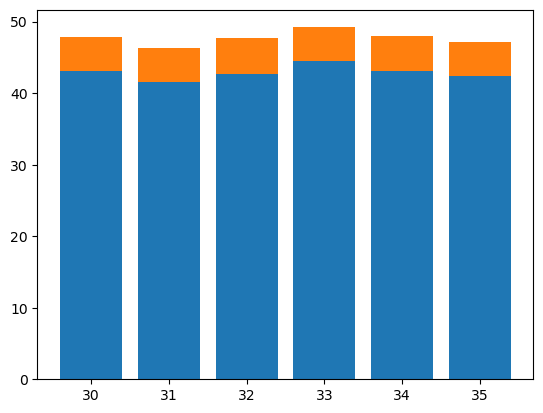

In [28]:
Query6 = """
SELECT Avg(WorkWeekHrs), Avg(CodeRevHrs), Age 
FROM master 
where Age between 30 and 35
group by Age
"""

z = pd.read_sql_query(Query6, conn)
WorkWeekHrs= z['Avg(WorkWeekHrs)']
CodeRevHrs= z['Avg(CodeRevHrs)']
Age= z['Age']

fig, ax = plt.subplots()

ax.bar(Age, WorkWeekHrs, label='WorkWeekHrs')
ax.bar(Age, CodeRevHrs, bottom=WorkWeekHrs,
       label='CodeRevHrs')

plt.show()